EDA with NoiseTube data that has been cleaned for redundancies, and limited to a sensible area.

- Examine distribution of noise samples

- View coverage on map

In [162]:
# NoiseTube EDA
import pandas as pd
import seaborn as sns
import folium, shapefile
from folium import plugins
from pyproj import Proj, transform

In [5]:
noise = pd.read_csv('/Users/Ben/Dropbox/Insight/noisetube-scrape/noise-tube-boxed.csv')
len(noise)

536

In [3]:
print(
    noise.city.value_counts()
)

boston         290
summerville    163
cambridge       80
brookline        2
chelsea          1
Name: city, dtype: int64


In [6]:
noise.head()

,Unnamed: 0,lat,lng,minute,hour,loudness,city
0,0,42.323145,-71.053118,27.277778,3,47.166667,boston
1,1,42.323033,-71.052991,51.000000,12,40.615385,boston
2,2,42.324297,-71.054219,27.000000,3,43.666667,boston
3,3,42.324079,-71.053915,51.000000,12,41.272727,boston
4,4,42.323575,-71.053443,51.000000,12,42.500000,boston


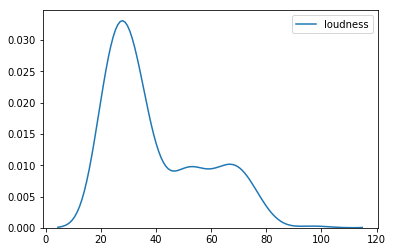

In [7]:
sns.kdeplot(noise.loudness)

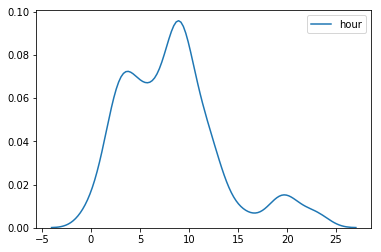

In [8]:
sns.kdeplot(noise.hour)

In [9]:
noise.hour.value_counts().sort_index()

0      12
1       3
2      33
3      57
4      36
5      32
6      38
7      31
8      29
9     104
10     29
11     26
12     34
13     16
14      3
15      6
16      4
17      1
18      1
19     13
20     12
21      5
22      1
23     10
Name: hour, dtype: int64

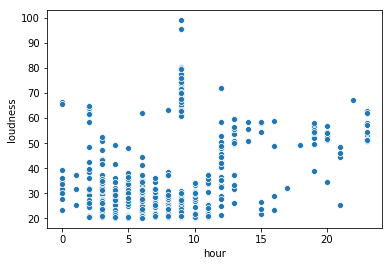

In [10]:
sns.scatterplot(
    y = 'loudness',
    x = 'hour',
    data = noise
)

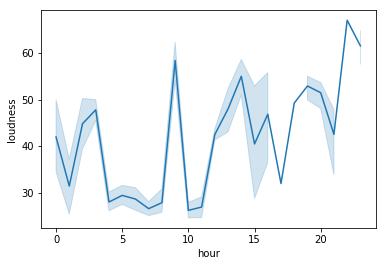

In [16]:
sns.lineplot(
    y = 'loudness', 
    x = 'hour',
    data = noise
)

In [164]:
nmap = folium.Map(
    location = [42.3601, -71.0589]
#     tiles = 'Stamen Toner'
)
for lat, lng, loudness in zip(noise.lat, noise.lng, noise.loudness):
    folium.CircleMarker(
        location = [lat, lng],
        fill_color = loudness,
        color = 'black',
        radius = 4,
        weight = 1
    ).add_to(nmap)

# defining a bounding box to drop observations
# that are too remote
folium.vector_layers.Rectangle(
    bounds = [[42.323, -71.14], [42.41, -71.018]]
).add_to(nmap)

nmap

In [15]:
# pull in predictors
fire = pd.read_csv('/Users/Ben/Dropbox/Insight/x-data-boston/Fire_Departments.csv')
fire.head()

,X,Y,OBJECTID_1,OBJECTID,BFD_ID,MAP_ID,MAPCODE,LOCCODE,LOCDEPT,LOCNAME,...,LOCPLAN,STUDY,ABOVE,ABOVE_DESC,SOURCE,GEOADDRESS,PD,CT90,XCOORD,YCOORD
0,-71.037152,42.334969,1,1.0,1.0,068,2,000,BFD,"ENGINE CO. 2, 19",...,F,T,3.0,"(2)275g Diesel, (1)1000g FO",FP,700 EAST 4TH STREET,SOUTH BOSTON,603,71037270.0,42334683.0
1,-71.068601,42.339871,2,2.0,2.0,071,2,002,BFD,ENGINE CO. 3,...,F,T,0.0,,FP,618 HARRISON AVE,SOUTH END,712,71069485.0,42339757.0
2,-71.065681,42.360842,3,3.0,3.0,036,2,003,BFD,"ENGINE CO. 4, 24",...,F,T,1.0,(1)500g diesel,FP,200 CAMBRIDGE ST,BACK BAY/BEACON HILL,202,71066570.0,42361100.0
3,-71.030239,42.379119,4,4.0,4.0,053,2,004,BFD,ENGINE CO. 5,...,F,T,1.0,(1)990g FO Basement,P,360 SARATOGA ST,EAST BOSTON,502,71031395.0,42378743.0
4,-71.070986,42.348924,5,5.0,5.0,040,2,005,BFD,"ENGINE CO. 7, 17",...,F,T,1.0,(1)500g Diesel,FPA,200 COLUMBUS AVE,CENTRAL,703,71072396.0,42348486.0


In [149]:
for lat, lng in zip(fire.Y, fire.X):
    folium.CircleMarker(
        location = [lat, lng],
        color = 'red',
        radius = 4,
        weight = 1
    ).add_to(nmap)

nmap

In [169]:
firem = shapefile.Reader('/Users/Ben/Dropbox/Insight/x-data-mass/firestations_pt/FIRESTATIONS_PT_MEMA')
# example methods
# firem.records()[0:10]
# firem.shapes()[0].points

[[178301.92421539873, 882279.5308560021]]

In [129]:
# convert from Mass xy to latlng
def xy_to_latlng(
    in_coord, # array-like input coords in xy
    inProj = Proj(init = 'epsg:26986'), # Mass x y coord system
    outProj = Proj(init = 'epsg:4326') # lat lng coord system 
    ):
    # note that transform returns in x y
    # which is lng lat
    lng, lat = transform(inProj, outProj, in_coord[0], in_coord[1])
    return (lat, lng)

fire_xy = [tuple(shape.points[0]) for shape in firem.shapes()]
fire_latlng = list()
for xy in fire_xy:
    fire_latlng.append(
        xy_to_latlng(xy)
    )
fire_latlng[0:10]

[(42.19065960515459, -71.76268880789124),
 (42.21694746003738, -71.75557217946833),
 (42.16735440120798, -71.35872718692961),
 (42.02760596775086, -71.5796242851853),
 (42.043221071169704, -71.58069756566167),
 (42.23936884006692, -71.10889947851119),
 (42.25439149988726, -71.08017320409516),
 (42.25798411650516, -71.04085186800361),
 (42.72253916527603, -72.9415829565476),
 (42.09671499104594, -72.31161266105882)]

In [150]:
for latlng in fire_latlng:
    folium.CircleMarker(
        location = latlng,
        color = 'orange',
        radius = 4,
        weight = 1
    ).add_to(nmap)

nmap

In [152]:
# I'll define a slightly larger bounding box in which to include predictors
folium.vector_layers.Rectangle(
    bounds = [[42.316, -71.15], [42.418, -71.008]]
).add_to(nmap)

nmap

In [160]:
# checking spread of restaurants
rest = pd.read_csv('/Users/Ben/Dropbox/Insight/x-data-boston/rest_latlng.csv')
rest.head()

,Unnamed: 0,lat,lng
0,0,42.361802,-71.060344
1,1,42.328358,-71.084086
2,2,42.341127,-71.054954
3,3,42.371035,-71.038806
4,4,42.339447,-71.069248


In [161]:
for lat, lng in zip(rest.lat, rest.lng):
    folium.CircleMarker(
        location = [lat, lng],
        color = 'green',
        radius = 4,
        weight = 1
    ).add_to(nmap)

nmap